### Group member
 - Sneha Agarwal
 - Nalini Agrawal
 - Qijing Zhang (Vicky)
 - Wenyue Shi (Ada)
 - Yuwen Wang
 - Suraj Tata Prasad

# Task A. 
### Ignore the text (reviews) and run a classification model with the numeric data (you can use standard methods like logistic regression, k-nearest neighbors or anything else). What is the best accuracy of your model?

In [1]:
import pandas as pd
from patsy import dmatrices
from sklearn.cross_validation import train_test_split

from sklearn import metrics
import numpy.random as npr
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### create the target column for the dataframe

array(['votes_cool', 'votes_funny', 'votes_useful', 'Cheap', 'Moderate',
       'Expensive', 'VeryExpensive', 'American', 'Chinese', 'French',
       'Japanese', 'Indian', 'Italian', 'Greek', 'Mediterranean',
       'Mexican', 'Thai', 'Vietnamese', 'Others', 'target'], dtype=object)

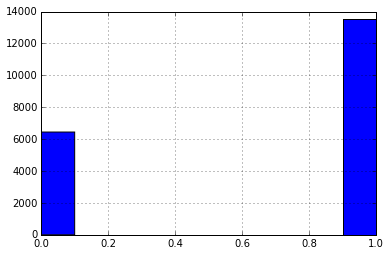

In [2]:
# load the dataset
df = pd.read_csv('yelp.csv')
# drop the review column
df = df.drop(['Review'], axis = 1)
# create a dummy variable for stars
df['target'] = df['stars'] > 3
df['target'].hist()
df = df.drop(['stars'], axis = 1)
df.columns.values

### create X and y values and split between train and test dataset

In [3]:
formula = 'target ~ 0 + votes_cool + votes_funny + votes_useful + Cheap + Moderate + Expensive + VeryExpensive + \
           American + Chinese + French + Japanese + Indian + Italian + Greek + Mediterranean + Mexican + Thai + \
           Vietnamese + Others'
Y, X = dmatrices(formula, df, return_type='dataframe') 
y = Y['target[True]']
# split the train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=1)

# resample from the low rates because we have fewer low rates records
n = len(y[y==1])
index_high = [i for i in y.index if y[i]]
index_low = [i for i in y.index if not y[i]]
new_low = npr.choice(index_low, size = n, replace = True)
high_X = X.ix[index_high]
high_y = y[index_high]
low_X = X.ix[new_low]
low_y = y[new_low]
new_X = np.concatenate((low_X, high_X), axis=0)
new_y = np.concatenate((low_y, high_y), axis = 0)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_X, new_y, test_size=0.4, random_state=1)

In [4]:
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

model_list = [('Naive Bayes', naive_bayes.MultinomialNB()), 
              ('K-nn', neighbors.KNeighborsClassifier(n_neighbors = 10, weights = 'uniform', p = 2)),
              ('logistic regression', LogisticRegression()),
              ('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=10, random_state=1)), 
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, max_depth=4, random_state=1))]


In [5]:
for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_train, y_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train) 
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

Fitting Naive Bayes
Fitting K-nn
Fitting logistic regression
Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


,Test Accuracy,Training Accuracy
Bagging,0.667667,0.731195
Decision Tree,0.665000,0.734195
Gradient Boosting,0.691333,0.703336
K-nn,0.614167,0.656547
Naive Bayes,0.679500,0.677620
Random Forest,0.670333,0.731124
logistic regression,0.685000,0.684977


### The highest accuracy is about 69%.

# Task B
### Perform a supervised classification on a subset of the corpus using the reviews only. You can write your code in Python or R. What accuracy do you get from this text mining exercise?

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.stem import WordNetLemmatizer

df = pd.read_csv('yelp.csv')
review = [r.decode('ascii', 'ignore') for r in df['Review']]
y = df['stars'] > 3
vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(review)
X = X.toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=1)

n = len(y[y==1])
index_high = [i for i in y.index if y[i]]
index_low = [i for i in y.index if not y[i]]
new_low = npr.choice(index_low, size = n, replace = True)
high_X = X[index_high]
high_y = y[index_high]
low_X = X[new_low]
low_y = y[new_low]
new_X = np.concatenate((low_X, high_X), axis=0)
new_y = np.concatenate((low_y, high_y), axis = 0)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_X, new_y, test_size=0.3, random_state=1)

In [8]:
model_list = [('Naive Bayes', naive_bayes.MultinomialNB()), 
              ('logistic regression', LogisticRegression())]

for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_train, y_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train) 
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

Fitting Naive Bayes
Fitting logistic regression


,Test Accuracy,Training Accuracy
Naive Bayes,0.843500,0.899636
logistic regression,0.844167,0.980713


In [9]:
print "Fitting all models after resampling"
for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_new_train, y_new_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_new_train)
    accuracy_train[name] = metrics.accuracy_score(y_new_train, prediction_train) 
    prediction_test = model.predict(X_new_test)
    accuracy_test[name] = metrics.accuracy_score(y_new_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

Fitting all models after resampling
Fitting Naive Bayes
Fitting logistic regression


,Test Accuracy,Training Accuracy
Naive Bayes,0.847639,0.894066
logistic regression,0.893753,0.983556


### The highest accuracy is 89.4%, which comes from logistic regression after resampling from low ratings.

# Task C
### Combine the numeric data and the text classification model (in task B) to create a “hybrid” model. It is your task to figure out how to do this. Now run this hybrid classification model and compare the results with those in A and B. 

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('yelp.csv')
review = [r.decode('ascii', 'ignore') for r in df['Review']]
others = df.drop(['Review', 'stars'], axis = 1)
y = df['stars'] > 3

vectorizer = CountVectorizer(min_df=1, stop_words='english')
X = vectorizer.fit_transform(review)
main_X = X.toarray()
other_X = others.as_matrix()
X = np.concatenate((main_X, other_X), axis=1)
X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=1)

n = len(y[y==1])
index_high = [i for i in y.index if y[i]]
index_low = [i for i in y.index if not y[i]]
new_low = npr.choice(index_low, size = n, replace = True)
high_X = X[index_high]
high_y = y[index_high]
low_X = X[new_low]
low_y = y[new_low]
new_X = np.concatenate((low_X, high_X), axis=0)
new_y = np.concatenate((low_y, high_y), axis = 0)
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_X, new_y, test_size=0.3, random_state=1)

In [32]:
model_list = [('Naive Bayes', naive_bayes.MultinomialNB()), 
              ('logistic regression', LogisticRegression())]

for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_train, y_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train) 
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

Fitting Naive Bayes
Fitting logistic regression


,Test Accuracy,Training Accuracy
Naive Bayes,0.836167,0.89885
logistic regression,0.837500,0.97607


In [33]:
print "Fitting all models after resampling"
for (name, model) in model_list: 
    print 'Fitting', name
    model.fit(X_new_train, y_new_train)
    
accuracy_train = {} 
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_new_train)
    accuracy_train[name] = metrics.accuracy_score(y_new_train, prediction_train) 
    prediction_test = model.predict(X_new_test)
    accuracy_test[name] = metrics.accuracy_score(y_new_test, prediction_test)

df = pd.DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test}) 
df

Fitting all models after resampling
Fitting Naive Bayes
Fitting logistic regression


,Test Accuracy,Training Accuracy
Naive Bayes,0.850590,0.897439
logistic regression,0.886375,0.980816


In [36]:
index = vectorizer.get_feature_names()
other_name = others.columns.values
all = list(index) + list(other_name)

for (name, model) in model_list:
    if name == "Naive Bayes":
        most_info= pd.Series(model.coef_[0], index = all)
        most_info.sort(ascending = False)
        print "most informative attributes for high ratings"
        print most_info[:10]
        print "most infromative attributes for low ratings"
        print most_info[-10:]

    

most informative attributes for high ratings
votes_useful   -3.838853
votes_cool     -4.217330
food           -4.443807
good           -4.469989
place          -4.568856
votes_funny    -4.625387
great          -4.653426
Moderate       -4.685982
like           -5.023096
just           -5.119353
dtype: float64
most infromative attributes for low ratings
possable                 -13.37258
dubiousness              -13.37258
dubbya                   -13.37258
duality                  -13.37258
possessive               -13.37258
dtpav4wfappezx_pvczrxa   -13.37258
possiblity               -13.37258
postage                  -13.37258
drysince                 -13.37258
wkend                    -13.37258
dtype: float64


### The accuracy in part C is much higher than part A but slightly lower than part B.

# Task D
### Use unsupervised sentiment analysis on the reviews (with SentiStrength or any other tool) and use the sentiment score to predict high/low rating. Compare and contrast the results of tasks B and D. What can you conclude from your analysis?

In [35]:
reviews_rated = pd.read_csv('reviews1_out.txt',sep='\t')
X = reviews_rated['Positive'] + reviews_rated['Negative']
X = X.drop(0, axis=0)
X = np.reshape(X, newshape=(len(X), 1))
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.4, random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print "Fitting Logistic Regression"
print "Using the sum of Positive and Negative score as X"
print "The accuracy is", accuracy

Fitting Logistic Regression
Using the sum of Positive and Negative score as X
The accuracy is 0.724625


In [29]:
reviews_rated = pd.read_csv('reviews1_out.txt', sep = '\t')
X = reviews_rated[['Positive', 'Negative']]
X = X.drop(0, axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.4, random_state=1)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print "Fitting Logistic Regression"
print "Using both Positive and Negative score as X"
print "The accuracy is", accuracy

Fitting Logistic Regression
Using both Positive and Negative score as X
The accuracy is 0.736125


### The accuracy in part D is much lower than that of part B.

# Task E
### Use unsupervised clustering on the text. Does clustering achieve “good” separation between high and low rated restaurants? How can you explain the result?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans, MiniBatchKMeans

df = pd.read_csv('yelp.csv')
review = [r.decode('ascii', 'ignore') for r in df['Review']]
y = df['stars'] > 4
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(review)

# Dimention reduction, similar to PCA, choose the first 5 components
svd = TruncatedSVD(n_components = 5, random_state = 2)
lsa = make_pipeline(svd, Normalizer(copy=False))
X = lsa.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3)

n = len(y[y==1])
index_high = [i for i in y.index if y[i]]
index_low = [i for i in y.index if not y[i]]
new_low = npr.choice(index_low, size = n, replace = True)
high_X = X[index_high]
high_y = y[index_high]
low_X = X[new_low]
low_y = y[new_low]
new_X = np.concatenate((low_X, high_X), axis=0)
new_y = np.concatenate((low_y, high_y), axis = 0)
# X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(new_X, new_y, test_size=0.3, random_state=1)

In [20]:
from nltk.cluster import KMeansClusterer, cosine_distance
clusterer = KMeansClusterer(2, cosine_distance, repeats=100)
clusters = clusterer.cluster(X, True)

None [[ 0.88882547 -0.43928777  0.07952773  0.08716016 -0.05562368]
 [ 0.59046521  0.39408481 -0.19534897  0.09015685  0.67064038]
 [ 0.80498933 -0.02921724  0.09920451 -0.14959925  0.56472742]
 ..., 
 [ 0.72354625  0.6568264   0.12283658 -0.17178259  0.02149005]
 [ 0.9458513  -0.21672512  0.0196899  -0.12284596 -0.20716351]
 [ 0.63505422  0.17858968  0.23744712 -0.33878908 -0.62741748]]


In [21]:
# print('Clustered:', vectors)
metrics.accuracy_score(y, clusters)

0.61688084404220211

In [22]:
clusters_resample = clusterer.cluster(new_X, True)
metrics.accuracy_score(new_y, clusters_resample)

None [[ 0.92624309  0.10728293  0.21678     0.02418972 -0.28807186]
 [ 0.82954455  0.05633541  0.12262057 -0.14458779  0.52224585]
 [ 0.96668246 -0.23292961 -0.04726275  0.09422988 -0.01248148]
 ..., 
 [ 0.82214436  0.29873822  0.21410073 -0.33081528 -0.28205718]
 [ 0.72354625  0.6568264   0.12283658 -0.17178259  0.02149005]
 [ 0.63505422  0.17858968  0.23744712 -0.33878908 -0.62741748]]


0.59865215979214026

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = 'k-means++', n_clusters=2, random_state=1, max_iter=100, n_init=10)
kmeans.fit(X)
# scatter(X[:,0], X[:,1], c=y.values, cmap = 'gist_ncar')
# scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='gist_ncar')
# scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="x", s=200, linewidths=5)
prediction = kmeans.labels_
metrics.accuracy_score(y, prediction)
# metrics.adjusted_rand_score(y, prediction) 
# print("Top terms per cluster:")
# order_centroids = km.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(2):
#     print("Cluster %d:" % i)
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind])
#     print()

0.60983049152457625

### In part E, the unsupervised clustering gave pretty low accuracy compared with previous parts. 
After assigning 5 star to be high rating and 1-4 star to be low rating, the accuracy increased from 40% to 60%, which is still the lowest of the six parts. 